In [1]:
import pandas as pd
import numpy as np

# Modelo Recurrentes con Embeddings a nivel de caracter

In [2]:
df = pd.read_csv('data/acetylcholinesterase_02_bioactivity_data_preprocessed.csv')

In [3]:
df

,molecule_chembl_id,canonical_smiles,standard_value,standard_value_norm,pIC50
0,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,750.0,750.0,6.124939
1,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,100.0,100.0,7.000000
2,CHEMBL131588,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,50000.0,50000.0,4.301030
3,CHEMBL130628,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,300.0,300.0,6.522879
4,CHEMBL130478,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,800.0,800.0,6.096910
...,...,...,...,...,...
5658,CHEMBL4779440,Brc1ccc([N+]2=Cc3ccccc3CC2)cc1.[Br-],10500.0,10500.0,4.978811
5659,CHEMBL417799,C[n+]1cc2c3c(ccc2c2ccc4cc5c(cc4c21)OCO5)OCO3,1220.0,1220.0,5.913640
5660,CHEMBL13045,COc1ccc2c(c[n+](C)c3c4cc5c(cc4ccc23)OCO5)c1OC,1450.0,1450.0,5.838632
5661,CHEMBL3085398,C=CC(C)(C)c1cc([C@@H]2CC(=O)c3c(O)cc(O)c(CC=C(...,28980.0,28980.0,4.537902


# Canonical_smiles To secuence

In [4]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

Utilizando Tokenizer y pad_sequences de keras a nivel de caracter, obtener la entrada tokenizada. Por ejemplo:

**El smiles**:

'C[C@@]12CC[C@H]3[C@]4(C)CCC[C@@]5(C)C(=O)OCC[N+](C)(C)CCCCCCCCC[N+](C)(C)CCOC(=O)[C@]6(C)CCC[C@]7(C)[C@@H]6CC[C@@]68C[C@@H](OC(=O)CCCCCCCCC(=O)O[C@@H]1C[C@@]3(CC[C@@H]45)C2)[C@@](C)(CC[C@@H]76)C8.[Br-].[Br-]'

**Tendría que quedar algo asi (puede que no sea exacto):**

array([ 2, 11,  2, 13, 13, 12,  5,  7,  2,  2, 11,  2, 13, 16, 12, 10, 11,
        2, 13, 12, 15,  3,  2,  4,  2,  2,  2, 11,  2, 13, 13, 12, 23,  3,
        2,  4,  2,  3,  9,  6,  4,  6,  2,  2, 11,  8, 21, 12,  3,  2,  4,
        3,  2,  4,  2,  2,  2,  2,  2,  2,  2,  2,  2, 11,  8, 21, 12,  3,
        2,  4,  3,  2,  4,  2,  2,  6,  2,  3,  9,  6,  4, 11,  2, 13, 12,
       30,  3,  2,  4,  2,  2,  2, 11,  2, 13, 12, 35,  3,  2,  4, 11,  2,
       13, 13, 16, 12, 30,  2,  2, 11,  2, 13, 13, 12, 30, 36,  2, 11,  2,
       13, 13, 16, 12,  3,  6,  2,  3,  9,  6,  4,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  3,  9,  6,  4,  6, 11,  2, 13, 13, 16, 12,  5,  2, 11,
        2, 13, 13, 12, 10,  3,  2,  2, 11,  2, 13, 13, 16, 12, 15, 23,  4,
        2,  7,  4, 11,  2, 13, 13, 12,  3,  2,  4,  3,  2,  2, 11,  2, 13,
       13, 16, 12, 35, 30,  4,  2, 36, 20, 11, 25, 26, 17, 12, 20, 11, 25,
       26, 17, 12], dtype=int32)
       

**Otro ejemplo:**
smiles: 'NC(=O)O'

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 8, 2, 3, 9, 6, 4, 6], dtype=int32)

**Tener en cuenta:**

- Ver cuanta es la máxima longitud para agregar el padding correspondiente
- En el ejemplo se agrego padding a la izquierda

In [5]:
max_len_idx = df['canonical_smiles'].apply(len).argmax()
min_len_idx = df['canonical_smiles'].apply(len).argmin()

In [6]:
X = df['canonical_smiles']
y = df['pIC50']
df.head(1)

,molecule_chembl_id,canonical_smiles,standard_value,standard_value_norm,pIC50
0,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,750.0,750.0,6.124939


In [7]:
df['canonical_len'] = df['canonical_smiles'].apply(lambda x: len(x))
max_sequence_len = df['canonical_len'].max()

In [8]:
# Implementar tokenización y guardar en X_seq_pad el dataset tokenizado
tokenizer = Tokenizer(
    num_words = None,
    filters='',
    lower=False,
    split=' ',
    char_level=True,
    oov_token=None)

tokenizer.fit_on_texts(X)
X_seq = tokenizer.texts_to_sequences(X)

X_seq_pad = pad_sequences(X_seq, maxlen=max_sequence_len)

In [9]:
len(tokenizer.word_index)

38

# Split

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X_seq_pad, y, test_size=0.2, random_state=42)

In [12]:
len(X_train), len(y_train), len(X_test)

(4530, 4530, 1133)

# Network Model

In [13]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding, Bidirectional, Dropout, Activation, BatchNormalization
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras import backend as K

In [14]:
# Métrica
def R2(y_true, y_pred):
    SS_res =  K.sum(K.square( y_true - y_pred ))
    SS_tot = K.sum(K.square( y_true - K.mean(y_true) ) )
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

In [15]:
# vocab_size = # Completar largo del vocabulario
vocab_size = len(tokenizer.word_index)
vocab_size

38

In [16]:
max_sequence_len = df['canonical_len'].max()
max_sequence_len

207

# Armar modelo en keras de LSTM
El de abajo es un ejemplo propuesto pero puede armar otro similar (siempre con LSTM o GRU)

In [17]:
embed_dim = 32
nb_words = vocab_size

model = Sequential(name='LSTM_1')
model.add(Embedding(nb_words + 1 , embed_dim, input_length=max_sequence_len, trainable=True))
model.add(Bidirectional(LSTM(100, activation='tanh')))
model.add(Dense(50))
model.add(BatchNormalization())
model.add(Activation('tanh'))
model.add(Dense(1))

# Implementar modelo completo
model.summary()


Model: "LSTM_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 207, 32)           1248      
                                                                 
 bidirectional (Bidirectiona  (None, 200)              106400    
 l)                                                              
                                                                 
 dense (Dense)               (None, 50)                10050     
                                                                 
 batch_normalization (BatchN  (None, 50)               200       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 50)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 51   

In [18]:
model.compile(optimizer=RMSprop(learning_rate=0.001), loss='mse', metrics=[R2])

In [19]:
mcp = ModelCheckpoint('models/best_model_{epoch}', save_best_only=True, save_format="h5")

In [20]:
es = EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience=10,
    verbose=0,
    mode="auto",
    baseline=None,
    restore_best_weights=True)

In [21]:
pd.set_option('display.max_columns', 50)

In [22]:
history = model.fit(X_train, y_train, epochs=100, batch_size=128, validation_data=(X_test, y_test), callbacks=[])

Epoch 1/100
26/36 [====================>.........] - ETA: 31s - loss: 32.5166 - R2: -11.6897

In [75]:
y_pred = model.predict(X_test)

# Score

In [76]:
r2 = 1 - ((y_test.values - y_pred.reshape(-1)) ** 2).sum() / ((y_test - y_test.mean()) ** 2).sum()

In [77]:
r2
# 0.6213507999746191

0.666153162602203

In [78]:
model.save('models/embed_32_bi_lstm_100_dense_50_bn.h5')

# Load model (solo si se grabo el modelo)

In [79]:
from tensorflow.keras.models import load_model

In [80]:
model_loaded = load_model('models/embed_32_bi_lstm_100_dense_50_bn.h5', custom_objects={'R2': R2})

In [81]:
y_pred = model_loaded.predict(X_test)

In [82]:
r2 = 1 - ((y_test.values - y_pred.reshape(-1)) ** 2).sum() / ((y_test - y_test.mean()) ** 2).sum()
r2

0.666153162602203

¿Hasta que valores de r2 logró?

# Evaluación

<function matplotlib.pyplot.show(close=None, block=None)>

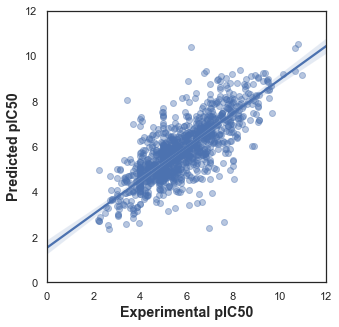

In [83]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes=True)
sns.set_style("white")

ax = sns.regplot(x=y_test, y=y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(0, 12)
ax.set_ylim(0, 12)
ax.figure.set_size_inches(5, 5)
plt.show

## embed_64_bi_lstm_100_dense_50_bn RMSprop(0.001) 100ep val_R2: 0.6213507999746191

## embed_8_bi_lstm_100_dense_50_bn RMSprop(0.001) 100ep val_R2: -4.543342077348178 :<

## embed_32_bi_lstm_100_dense_50_bn RMSprop(0.001) 100ep val_R2: 0.666153162602203